In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Obfuscated-MalMem2022.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (58596, 57)


,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [2]:
df.drop(columns = 'Category', axis = 1, inplace = True)

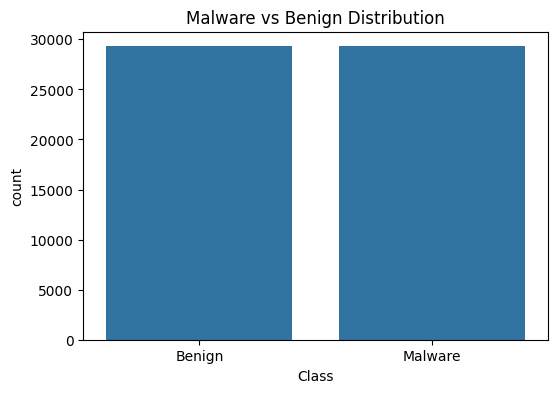

Class
Benign     0.5
Malware    0.5
Name: proportion, dtype: float64


In [3]:
# Target variable analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Malware vs Benign Distribution')
plt.show()

# Class ratio
print(df['Class'].value_counts(normalize=True))

In [5]:
df.columns

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_p

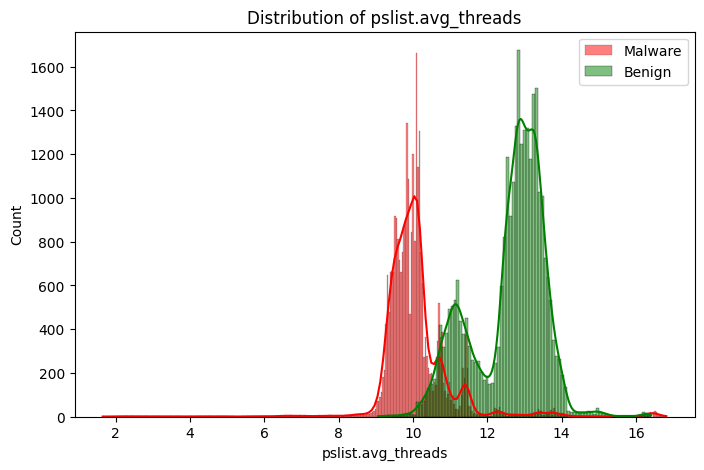

In [4]:
# Plot feature distributions for malware vs benign
malware = df[df['Class'] == 'Malware']
benign = df[df['Class'] == 'Benign']

# Example: Compare a numerical feature (e.g., 'Threads')
plt.figure(figsize=(8, 5))
sns.histplot(malware['pslist.avg_threads'], color='red', label='Malware', kde=True)
sns.histplot(benign['pslist.avg_threads'], color='green', label='Benign', kde=True)
plt.title('Distribution of pslist.avg_threads')
plt.legend()
plt.show()

In [7]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


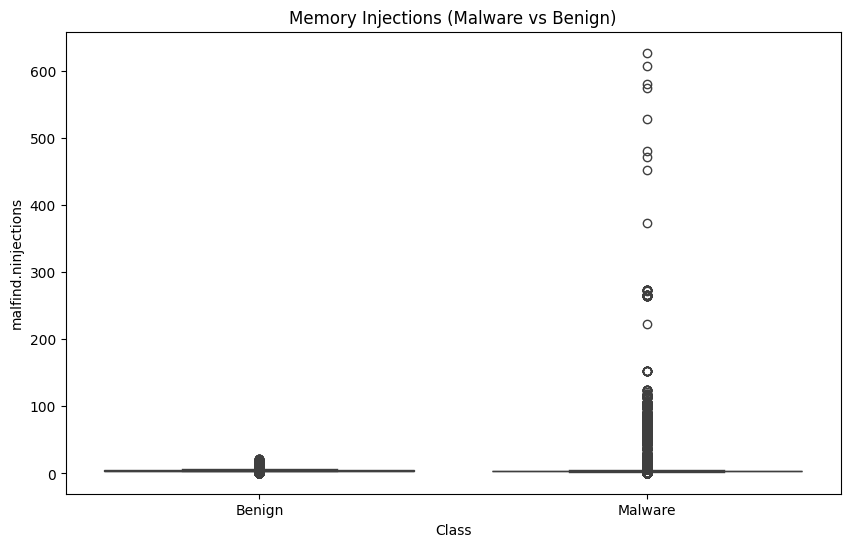

In [8]:
# Example: Compare "malfind.ninjections" between classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='malfind.ninjections', data=df)
plt.title('Memory Injections (Malware vs Benign)')
plt.show()

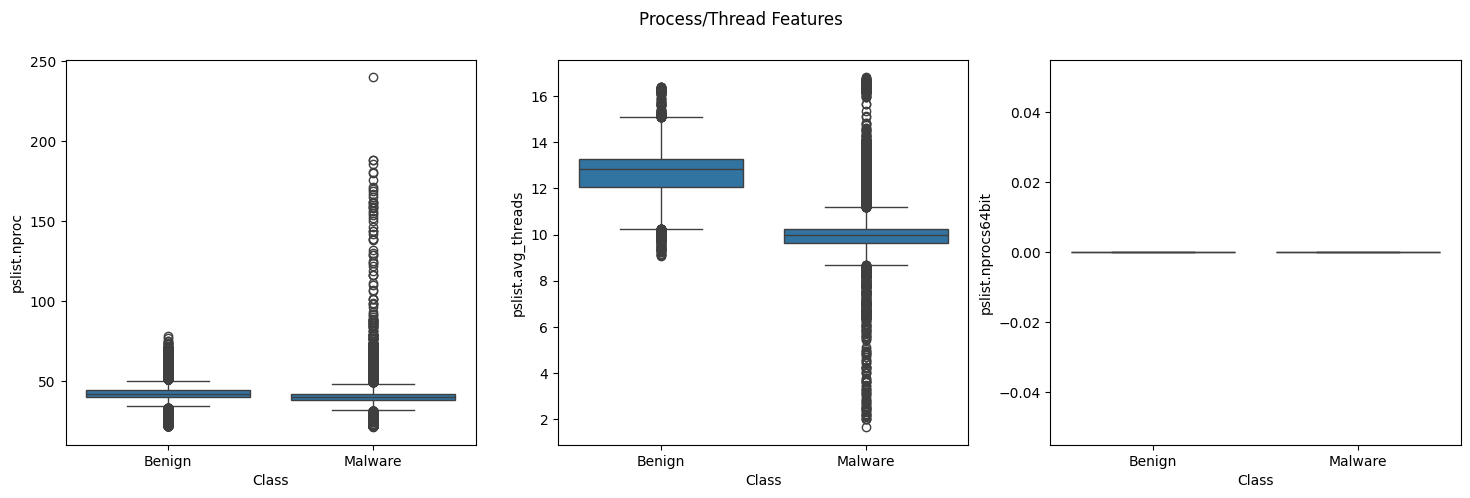

In [9]:
# Analyze process/thread features
ps_features = ['pslist.nproc', 'pslist.avg_threads', 'pslist.nprocs64bit']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feat in enumerate(ps_features):
    sns.boxplot(x='Class', y=feat, data=df, ax=axes[i])
plt.suptitle('Process/Thread Features')
plt.show()

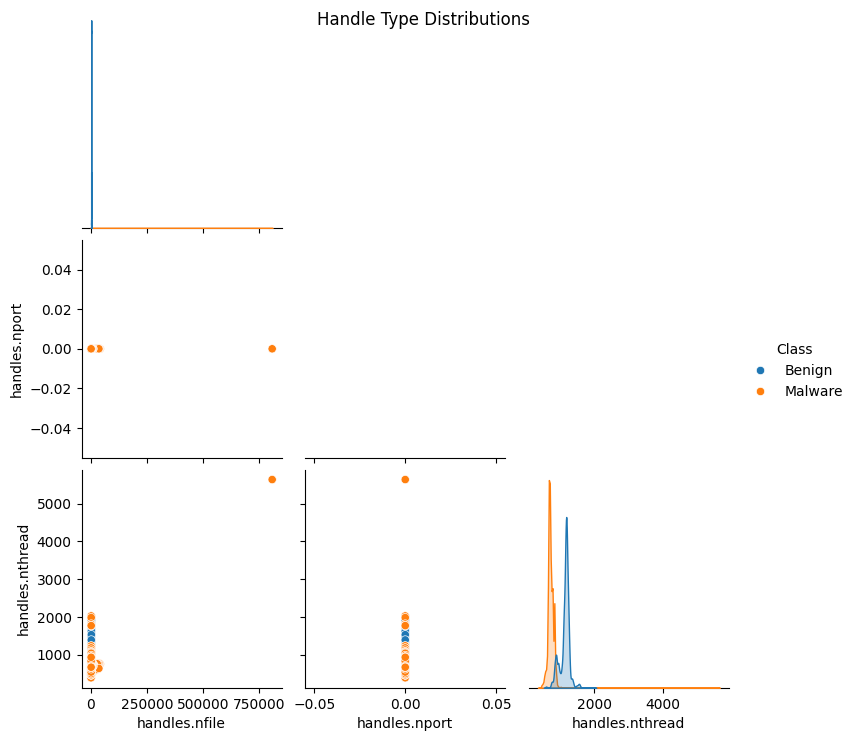

In [10]:
# Handle types (files, ports, etc.)
handle_features = ['handles.nfile', 'handles.nport', 'handles.nthread']
sns.pairplot(df[handle_features + ['Class']], hue='Class', corner=True)
plt.suptitle('Handle Type Distributions')
plt.show()

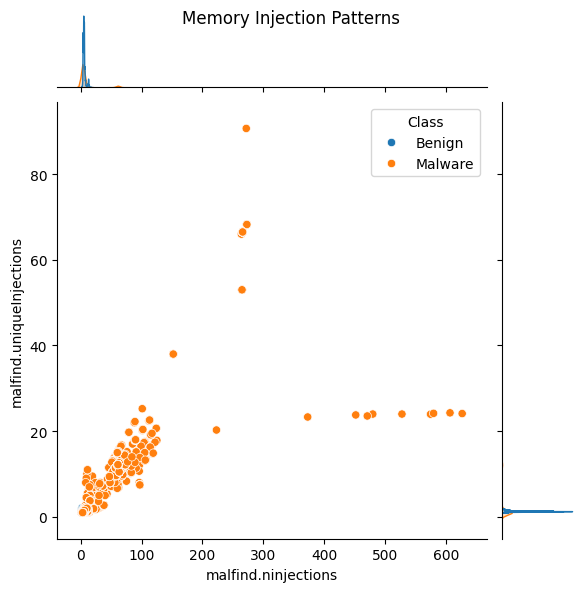

In [11]:
# Memory injection features
malfind_features = ['malfind.ninjections', 'malfind.uniqueInjections']
sns.jointplot(data=df, x='malfind.ninjections', y='malfind.uniqueInjections', hue='Class')
plt.suptitle('Memory Injection Patterns')
plt.show()

In [14]:
# Encode the target variable (if not already done)
df['Class'] = df['Class'].map({'Malware': 1, 'Benign': 0})

# Calculate correlation of all features with the target
corr_with_target = df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)

# Display all features sorted by correlation strength
print("Correlation with 'Class' (sorted by absolute value):\n")
print(corr_with_target.to_string())  # Show all features

Correlation with 'Class' (sorted by absolute value):

Class                                     1.000000
dlllist.avg_dlls_per_proc                 0.908555
handles.nevent                            0.876770
handles.nthread                           0.872531
handles.nmutant                           0.855148
dlllist.ndlls                             0.823933
handles.nsection                          0.820967
pslist.avg_threads                        0.790666
ldrmodules.not_in_load                    0.787472
ldrmodules.not_in_mem                     0.787413
handles.ntimer                            0.783137
handles.nsemaphore                        0.769097
svcscan.process_services                  0.763656
ldrmodules.not_in_init                    0.716578
svcscan.shared_process_services           0.710979
handles.nkey                              0.698239
svcscan.nactive                           0.653268
svcscan.nservices                         0.631078
pslist.nppid                

In [21]:
df['handles.nport'].value_counts()

handles.nport
0    58596
Name: count, dtype: int64

In [23]:
df['pslist.nprocs64bit'].value_counts()

pslist.nprocs64bit
0    58596
Name: count, dtype: int64

In [24]:
df['svcscan.interactive_process_services'].value_counts()

svcscan.interactive_process_services
0    58596
Name: count, dtype: int64

In [25]:
df.drop(columns=['pslist.nprocs64bit',
'handles.nport',
'svcscan.interactive_process_services'],
       axis = 1,
       inplace =True)
df.shape

(58596, 53)

C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\136614063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target[1:21].values, y=corr_with_target[1:21].index, palette='viridis')


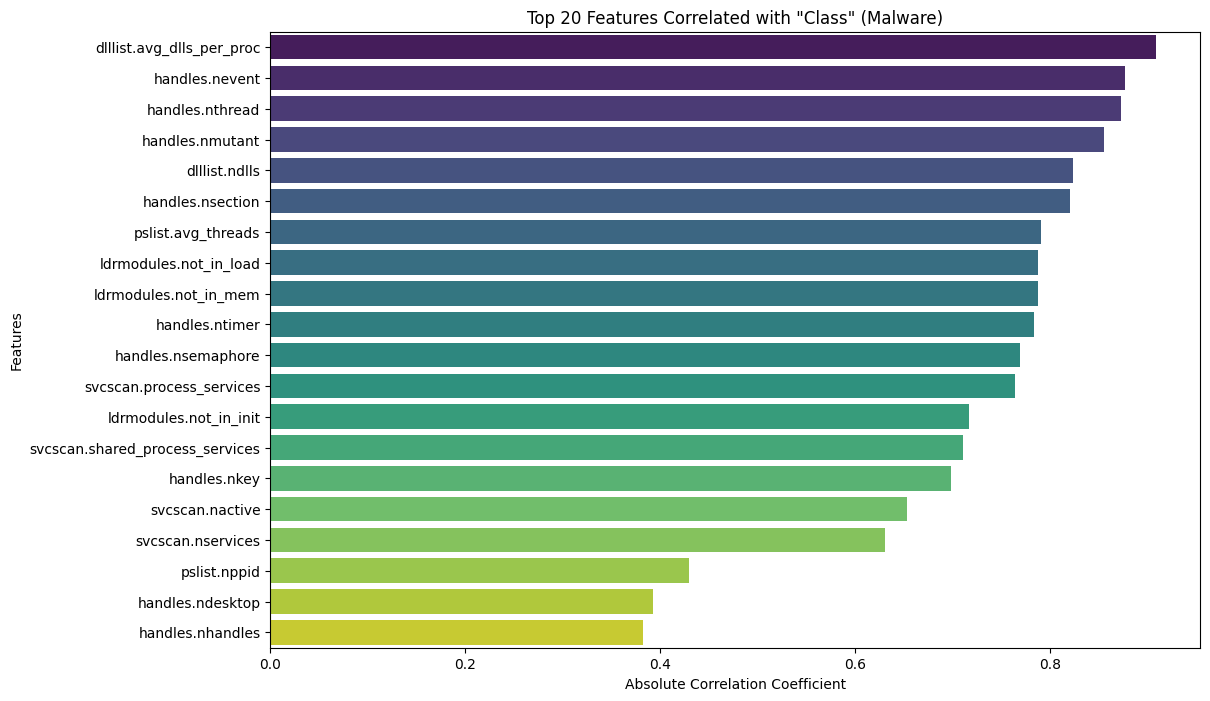

In [26]:
# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_target[1:21].values, y=corr_with_target[1:21].index, palette='viridis')
plt.title('Top 20 Features Correlated with "Class" (Malware)')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()

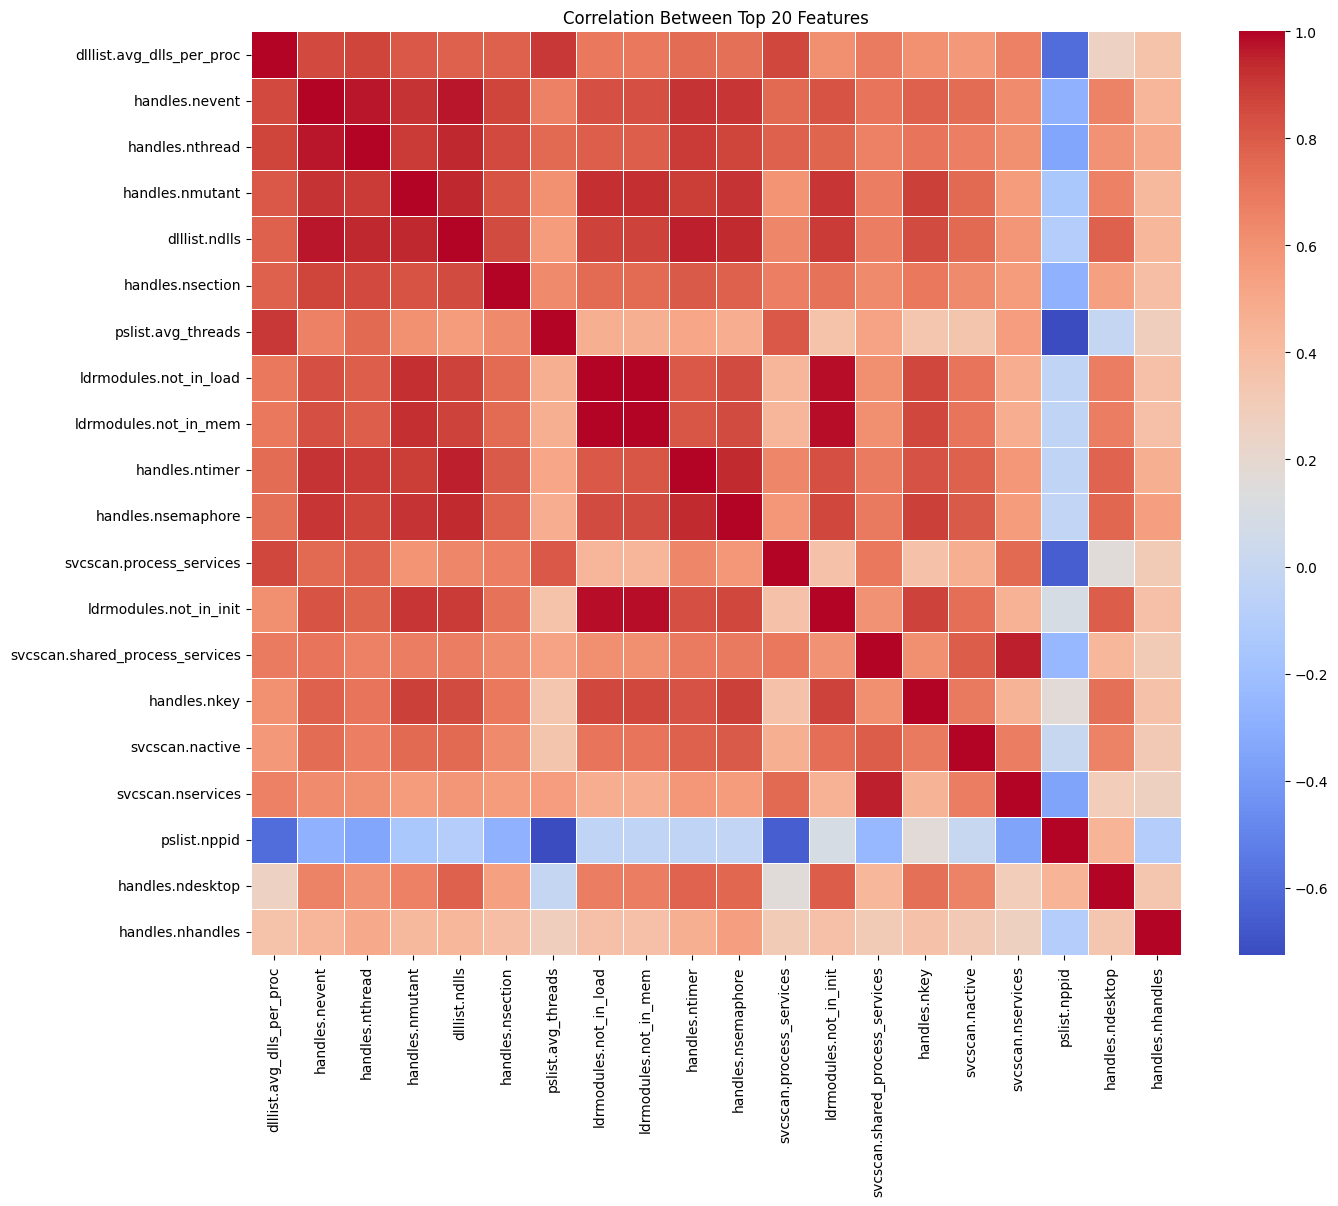

In [27]:
# Select top 20 features (excluding 'Class' itself)
top_features = corr_with_target[1:21].index.tolist()

# Compute correlation matrix for top features
corr_matrix = df[top_features].corr()

# Plot
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Top 20 Features')
plt.show()

### What is Mutual Information (MI)?

    - Definition: MI measures how much information the presence/absence of a feature contributes to correctly predicting the target variable (Class in your case).
    - Key Property: Unlike correlation (which only captures linear relationships), MI can detect non-linear relationships between features and the target.
    - Range: MI values range from 0 (no dependency) to 1 (perfect dependency).


### Why Use It for Malware Detection?

    - Non-Linear Relationships:
        Malware behavior often involves complex, non-linear patterns (e.g., thresholds in malfind.ninjections).
        MI can identify features that correlation might miss.

    - Feature Ranking:
        Rank features by MI scores to prioritize the most informative ones for your model.

    - Dimensionality Reduction:
        Remove low-MI features to reduce noise and improve model efficiency.


Top Features by Mutual Information:

svcscan.nservices                  0.686237
svcscan.shared_process_services    0.680558
svcscan.kernel_drivers             0.674254
dlllist.avg_dlls_per_proc          0.672384
handles.avg_handles_per_proc       0.658659
pslist.avg_handlers                0.654935
handles.nmutant                    0.649653
handles.nevent                     0.641760
handles.nsection                   0.640982
handles.nkey                       0.629620
handles.nhandles                   0.629425
dlllist.ndlls                      0.627724
handles.nsemaphore                 0.620677
handles.ntimer                     0.605522
pslist.avg_threads                 0.605253
handles.nfile                      0.588945
handles.nthread                    0.585350
ldrmodules.not_in_load             0.584697
ldrmodules.not_in_mem              0.582849
ldrmodules.not_in_load_avg         0.558246
Name: MI Scores, dtype: float64


C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\1132923836.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


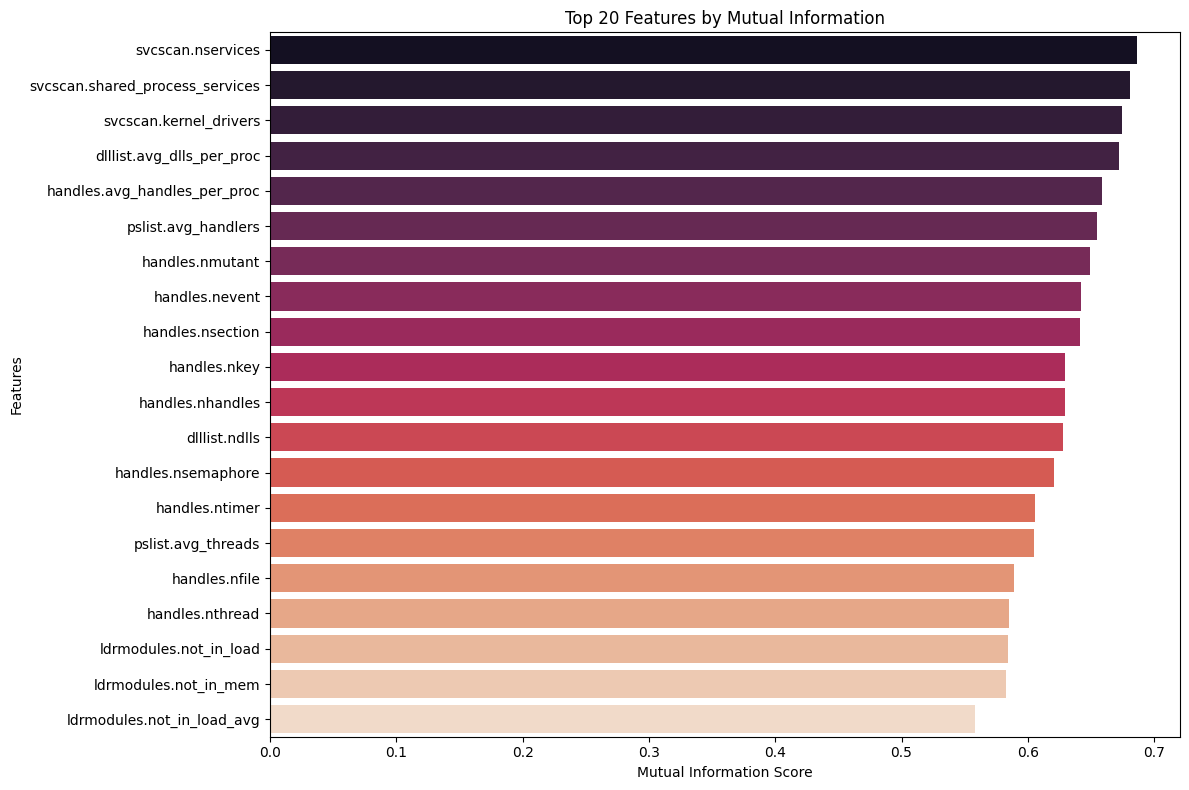

In [40]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target

# Compute MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create MI Series
mi_series = pd.Series(mi_scores, index=X.columns, name='MI Scores')
mi_series = mi_series.sort_values(ascending=False)

# Display top 20 features
print("Top Features by Mutual Information:\n")
print(mi_series.head(20))

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=mi_series.head(20).values, 
    y=mi_series.head(20).index, 
    palette='rocket'
)
plt.title('Top 20 Features by Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [41]:
# Compute correlation with target (exclude 'Class' from features)
corr_with_target = X.corrwith(y).abs().sort_values(ascending=False)

In [42]:
# Use .iloc for positional indexing
top_mi = mi_series.iloc[:20].index.tolist()        # Top 20 MI features
top_corr = corr_with_target.iloc[:20].index.tolist()  # Top 20 correlated features

# Combine features (ensure no duplicates)
combined_features = list(set(top_mi + top_corr))

In [45]:
# Compute inter-feature correlations
corr_matrix = X[combined_features].corr().abs()

# Identify pairs with correlation > 0.8
redundant_pairs = np.where(np.triu(corr_matrix > 0.7, k=1))
redundant_pairs = [
    (corr_matrix.columns[x], corr_matrix.columns[y]) 
    for x, y in zip(*redundant_pairs)
]

# Track features to keep (instead of features to drop)
features_to_keep = []

for pair in redundant_pairs:
    # Compare MI and correlation for the pair
    mi_pair = mi_series.loc[list(pair)]
    corr_pair = corr_with_target.loc[list(pair)].abs()
    
    # Select the feature with higher MI or correlation
    if mi_pair[0] > mi_pair[1] or corr_pair[0] > corr_pair[1]:
        better_feature = pair[0]
    else:
        better_feature = pair[1]
    
    # Add the better feature to the keep list
    if better_feature not in features_to_keep:
        features_to_keep.append(better_feature)

# Final features = combined_features minus redundant ones not in features_to_keep
final_features = [f for f in combined_features if f in features_to_keep]

C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\2864648713.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mi_pair[0] > mi_pair[1] or corr_pair[0] > corr_pair[1]:
C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\2864648713.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mi_pair[0] > mi_pair[1] or corr_pair[0] > corr_pair[1]:
C:\Users\Naruto\AppData\Local\Temp\ipykernel_2920\2864648713.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

In [46]:
len(final_features)

19

In [47]:
final_features

['handles.nsection',
 'handles.nhandles',
 'svcscan.process_services',
 'dlllist.ndlls',
 'ldrmodules.not_in_load',
 'handles.ntimer',
 'handles.nsemaphore',
 'handles.nkey',
 'handles.nevent',
 'handles.nmutant',
 'svcscan.shared_process_services',
 'pslist.avg_handlers',
 'pslist.avg_threads',
 'ldrmodules.not_in_init',
 'ldrmodules.not_in_mem',
 'svcscan.nservices',
 'handles.avg_handles_per_proc',
 'dlllist.avg_dlls_per_proc',
 'handles.nthread']

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [49]:
# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[final_features])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
X_train.shape, y_train.shape

((46876, 19), (46876,))

In [51]:
X_test.shape, y_test.shape

((11720, 19), (11720,))

In [52]:
# PyTorch Dataset
class MalwareDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [53]:
# DataLoaders
train_loader = DataLoader(MalwareDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(MalwareDataset(X_test, y_test), batch_size=64)

In [54]:
# Model definition

class MalwareDetector(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

In [55]:
model = MalwareDetector(input_dim=len(final_features))

In [56]:
# Training setup
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [63]:
# Training loop
for epoch in range(10):
    model.train()
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features).squeeze()
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        total_correct = 0
        for batch_features, batch_labels in test_loader:
            outputs = model(batch_features).squeeze()
            predicted = (outputs >= 0.5).float()
            total_correct += (predicted == batch_labels).sum().item()
        accuracy = total_correct / len(y_test)
        print(f"Epoch {epoch+1}/10, Test Accuracy: {accuracy:.4f}")

# Save model
torch.save(model.state_dict(), 'malware_detector.pt')
print("Model saved!")

Epoch 1/10, Test Accuracy: 0.9983
Epoch 2/10, Test Accuracy: 0.9983
Epoch 3/10, Test Accuracy: 0.9983
Epoch 4/10, Test Accuracy: 0.9983
Epoch 5/10, Test Accuracy: 0.9983
Epoch 6/10, Test Accuracy: 0.9983
Epoch 7/10, Test Accuracy: 0.9983
Epoch 8/10, Test Accuracy: 0.9983
Epoch 9/10, Test Accuracy: 0.9983
Epoch 10/10, Test Accuracy: 0.9983
Model saved!


Epoch 1/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 2/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 3/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 4/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 5/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 6/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 7/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 8/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 9/10
Train Loss: 0.5039 | Val Loss: 0.5040
Val Accuracy: 0.9983
-----------------------------------
Epoch 10/10
Train Loss: 0.5039 | Val Loss: 0.5

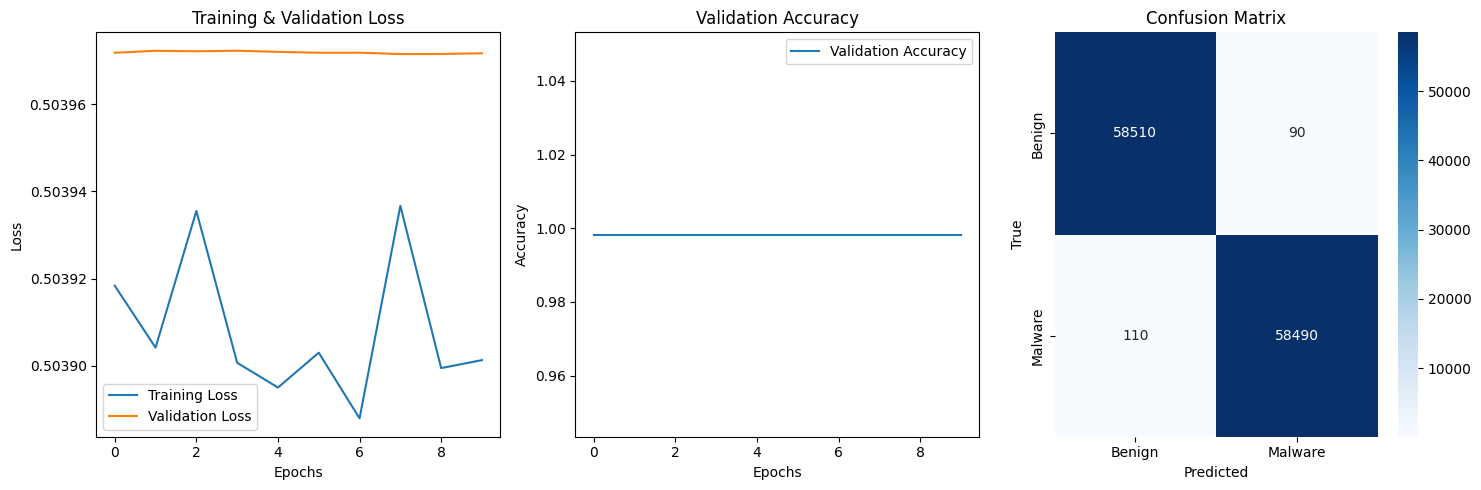


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     58600
     Malware       1.00      1.00      1.00     58600

    accuracy                           1.00    117200
   macro avg       1.00      1.00      1.00    117200
weighted avg       1.00      1.00      1.00    117200



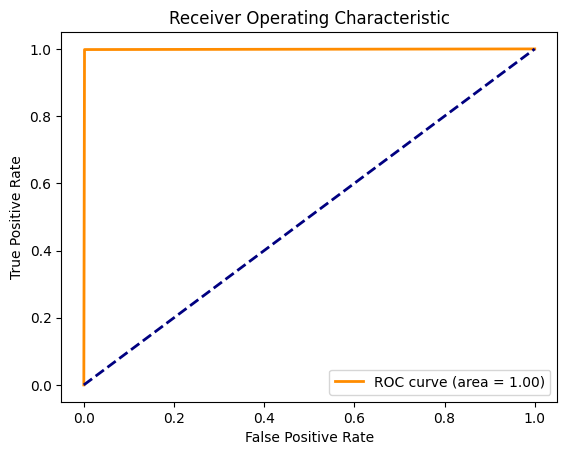

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Lists to store metrics
train_losses = []
val_losses = []
val_accuracies = []
all_preds = []
all_labels = []

# Training loop with metrics collection
for epoch in range(10):
    model.train()
    epoch_loss = 0.0
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features).squeeze()
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    # Store training loss
    train_losses.append(epoch_loss/len(train_loader))
    
    # Validation
    model.eval()
    epoch_val_loss = 0.0
    total_correct = 0
    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            outputs = model(batch_features).squeeze()
            loss = criterion(outputs, batch_labels)
            epoch_val_loss += loss.item()
            
            predicted = (outputs >= 0.5).float()
            total_correct += (predicted == batch_labels).sum().item()
            
            # Store for final metrics
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())
    
    # Store validation metrics
    val_losses.append(epoch_val_loss/len(test_loader))
    accuracy = total_correct / len(y_test)
    val_accuracies.append(accuracy)
    
    print(f"Epoch {epoch+1}/10")
    print(f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")
    print(f"Val Accuracy: {accuracy:.4f}")
    print("-----------------------------------")

# Save model
torch.save(model.state_dict(), 'malware_detector.pt')
print("Model saved!")

# Plotting section
plt.figure(figsize=(15, 5))

# Loss curve
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Benign', 'Malware'], 
           yticklabels=['Benign', 'Malware'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Additional metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malware']))

# ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Trying new network

In [71]:
import torch.optim as optim

# Advanced Model Architecture
class MalwareNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ELU(),
            nn.Dropout(0.5)
        )
        self.attention = nn.MultiheadAttention(512, 4)
        self.block2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.SiLU(),
            nn.Dropout(0.4)
        )
        self.block3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ELU(),
            nn.Dropout(0.3)
        )
        self.output = nn.Sequential(
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.block1(x)
        x_att, _ = self.attention(x.unsqueeze(1), x.unsqueeze(1), x.unsqueeze(1))
        x = x + x_att.squeeze(1)
        x = self.block2(x)
        x = self.block3(x)
        return self.output(x)



In [72]:
# Create dataloaders
batch_size = 128
train_loader = DataLoader(MalwareDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(MalwareDataset(X_test, y_test), batch_size=batch_size)

# Initialize model and training components
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MalwareNet(X_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(train_loader), epochs=50)


In [73]:
# Training loop
train_losses, val_losses = [], []
train_accs, val_accs = [], []
best_acc = 0.0

for epoch in range(50):
    # Training
    model.train()
    epoch_loss, correct, total = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        epoch_loss += loss.item()
        preds = (outputs >= 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    train_losses.append(epoch_loss/len(train_loader))
    train_accs.append(correct/total)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            val_loss += criterion(outputs, labels).item()
            preds = (outputs >= 0.5).float()
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
    
    val_loss = val_loss/len(test_loader)
    val_acc = val_correct/val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f'Epoch {epoch+1:02d} | '
          f'Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_loss:.4f} | '
          f'Train Acc: {train_accs[-1]:.4f} | Val Acc: {val_acc:.4f}')


Epoch 01 | Train Loss: 0.0601 | Val Loss: 0.0189 | Train Acc: 0.9871 | Val Acc: 0.9966
Epoch 02 | Train Loss: 0.0172 | Val Loss: 0.0110 | Train Acc: 0.9971 | Val Acc: 0.9982
Epoch 03 | Train Loss: 0.0117 | Val Loss: 0.0146 | Train Acc: 0.9979 | Val Acc: 0.9964
Epoch 04 | Train Loss: 0.0077 | Val Loss: 0.0155 | Train Acc: 0.9985 | Val Acc: 0.9943
Epoch 05 | Train Loss: 0.0077 | Val Loss: 0.0071 | Train Acc: 0.9985 | Val Acc: 0.9987
Epoch 06 | Train Loss: 0.0088 | Val Loss: 0.0400 | Train Acc: 0.9977 | Val Acc: 0.9939
Epoch 07 | Train Loss: 0.0086 | Val Loss: 0.0076 | Train Acc: 0.9980 | Val Acc: 0.9982
Epoch 08 | Train Loss: 0.0090 | Val Loss: 0.0387 | Train Acc: 0.9978 | Val Acc: 0.9947
Epoch 09 | Train Loss: 0.0158 | Val Loss: 0.0286 | Train Acc: 0.9962 | Val Acc: 0.9923
Epoch 10 | Train Loss: 0.0123 | Val Loss: 0.0097 | Train Acc: 0.9973 | Val Acc: 0.9984
Epoch 11 | Train Loss: 0.0103 | Val Loss: 0.0109 | Train Acc: 0.9974 | Val Acc: 0.9977
Epoch 12 | Train Loss: 0.0099 | Val Loss: 0

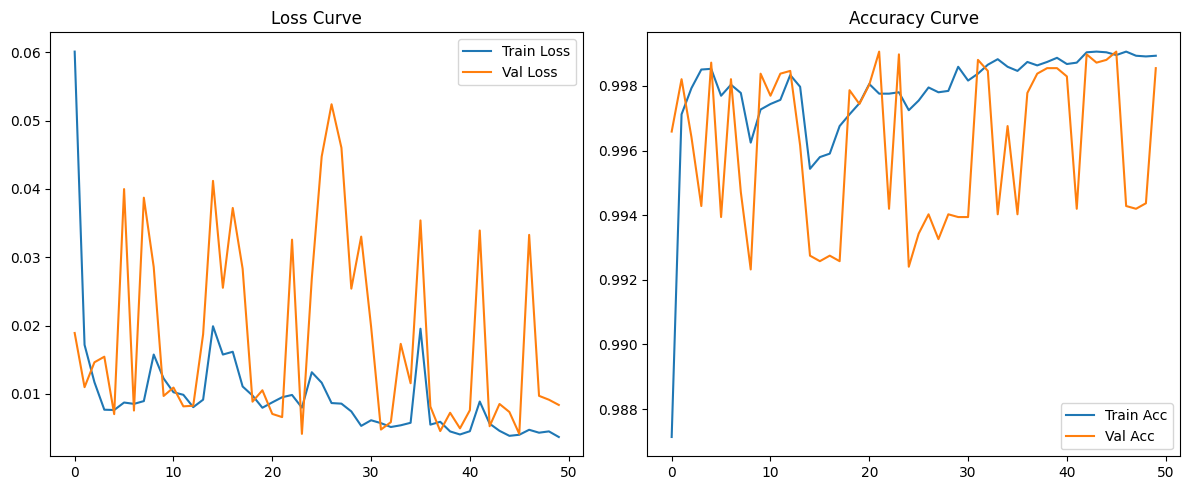


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5860
         1.0       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



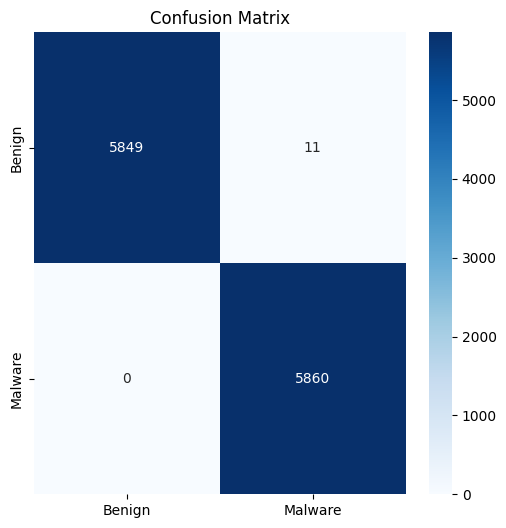

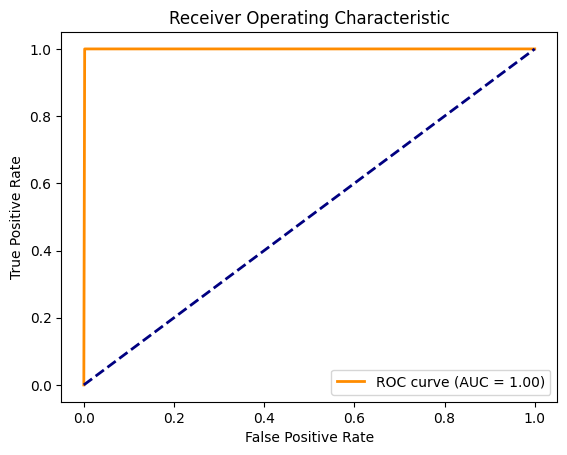

In [74]:
# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs).squeeze()
        all_preds.extend((outputs >= 0.5).float().cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print('\nClassification Report:')
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Benign', 'Malware'], 
           yticklabels=['Benign', 'Malware'])
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()